## Some ideas for a numerical solution to the SPACE model: Stream Power with Alluvium Conservation and Entrainment
Running a time loop, seeing if things are realistic.
Basic equation set so far, for 1D. Sediment flux downstream:

$$\frac{dq_s}{dx} = K_s q S (1-\exp (-H/H_* ) ) + (1-F_f) K_r q S \exp (-H/H_*) -Vq_s/q$$

Rate of change of alluv thickness:

$$(1-\phi ) \frac{\partial H}{\partial t} = V q_s/q - K_s q S (1-\exp (-H/H_* ) )$$

Rate of change of rock elev:

$$\frac{\partial R}{\partial t} = U - K_r q S \exp (-H/H_* )$$

Local analytical solution for sediment flux within a cell:

$$q_s = \left( \frac{E_s+(1-F_f)E_r}{V/q} \right) \left( 1-\exp (-Vx/q) \right) + q_{s0} \exp (-Vx/q)$$

Try a little 1D version with some initial slope $S_0$:

In this version, q increases downstream.
 - time units are seconds
 - distance units are meters

In [130]:
import numpy as np
num_nodes = 50
dx = 1.0
S0 = 0.01
V = 0.001 # settling velocity
Ff = 0.5
Ks = 1.0 # sed erodibility. not necessarily realistic
Kr = 0.001
Hstar = 1.0 # sed thickness req'd for full entrainment potential. Not necessarily realistic.
dt = 100.0 # seconds
total_time = 5000000.0
num_time_steps = int(total_time / dt)
U = 1.0e-7 # 1.0e-7 is still ~3m/year
r = 0.2 # some runoff factor

# array index
upper = np.arange(num_nodes-1)

# arrays
q = (np.arange(num_nodes) + 1)* dx * r # q = distance downstream * r
Voverq = V/q 
qs = np.zeros(num_nodes)
qs_in = np.zeros(num_nodes)
x = dx * np.arange(0, num_nodes)
H = np.zeros(num_nodes)
R = np.zeros(num_nodes)
z = (S0 * (num_nodes - 1) * dx - S0 * x)
R[:] = z

Time loop with a downstream distance loop inside (aaahh)

Time loop:

 - Each time step, first calculate S, Es and Er (functions of H)
 - Then, loop through the nodes from upstream to downstream calculating sediment flux.
 - Do a forward Euler solution for H
 - And rock uplift, R
 - And add R and H together to get elevation

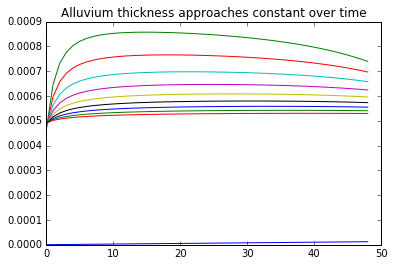

In [131]:
%matplotlib inline

for i in range(num_time_steps):
    S = (z[upper] - z[1:]) / dx
    
    Es = Ks * q[upper] * S * (1.0 - np.exp(-H[upper] / Hstar))
    
    Er = Kr * q[upper] * S * np.exp(-H[upper] / Hstar)
    
    for j in range(num_nodes - 1):
        qs[j] = (((Es[j]) + (1-Ff) * Er[j]) / Voverq[j]) * (1.0 - np.exp(-dx * Voverq[j])) + (qs_in[j] * np.exp(-dx * Voverq[j]))
        qs_in[j+1] = qs[j]
    
    H[upper] += dt * (qs[upper] * Voverq[upper]) - Ks * q[upper] * S *(1.0 - np.exp(-H[upper]/Hstar))
    
    R[upper] += dt * (U - Kr * q[upper] * S * (np.exp(-H[upper] / Hstar)))
    
    if i % 5000 == 0:
        plt.plot(H[:-1])
        plt.title('Alluvium thickness approaches constant over time')
    
    z = R + H 

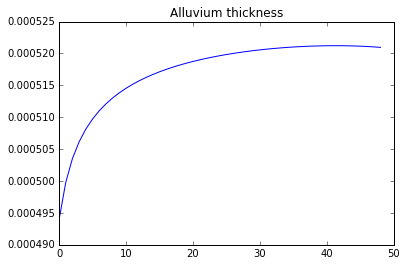

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(H[:-1])
plt.title('Alluvium thickness')

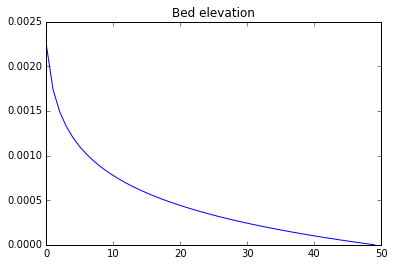

In [133]:
plt.plot(z)
plt.title('Bed elevation')

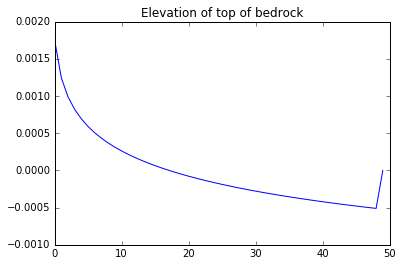

In [136]:
plt.plot(R)
plt.title('Elevation of top of bedrock')